In [13]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib
from functools import reduce
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [14]:
binomial = pd.read_hdf("/home/nikoleta/src/jobs/data/ch4_experiment/binomial.h5")
complete = pd.read_hdf("/home/nikoleta/src/jobs/data/ch4_experiment/complete.h5")

In [15]:
# fixing index of the data
binomial.index = range(len(binomial))
complete.index = range(len(complete))

In [16]:
data = binomial

In [17]:
# tournament size for the rest
data['tournament_size']=data.groupby('tournament_id')['player_name'].transform('count').values

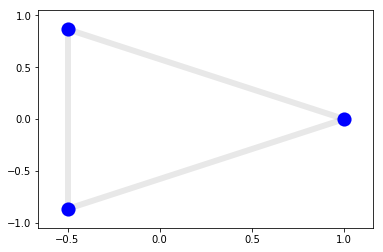

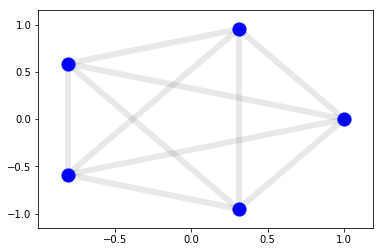

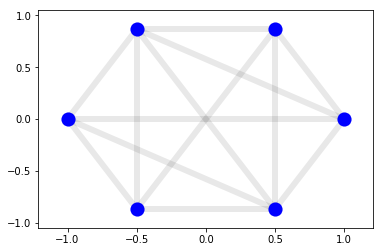

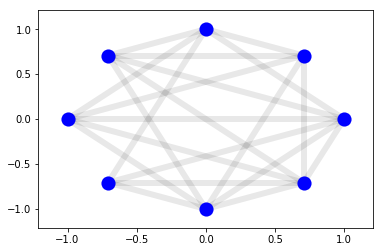

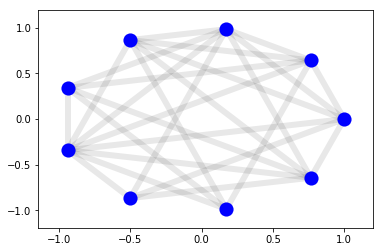

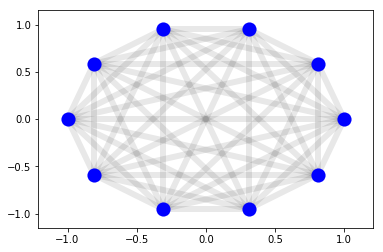

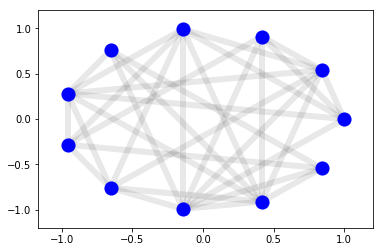

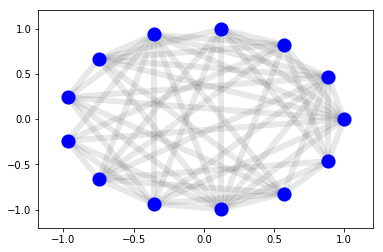

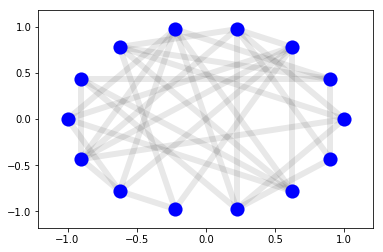

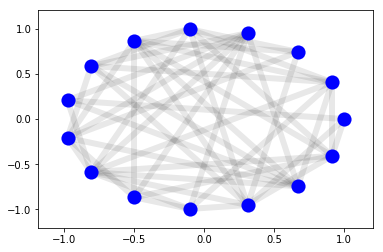

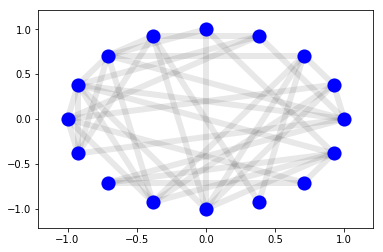

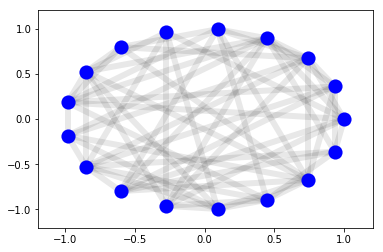

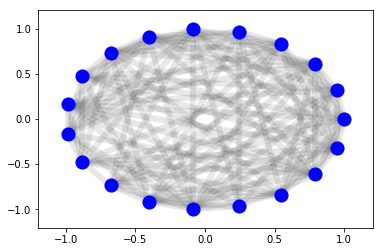

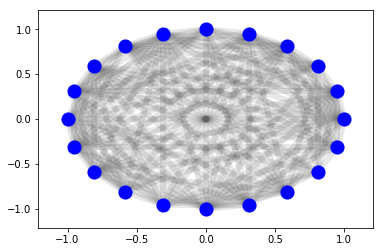

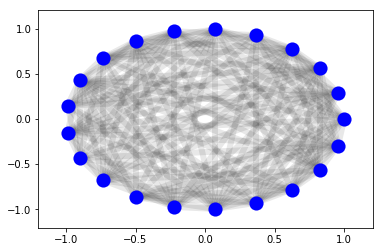

In [18]:
for i in data.tournament_id.unique():
    # get the nodes
    players = data.tournament_size[data.tournament_id==i].values[0]
    G = nx.Graph()
    G.add_nodes_from(range(players))

    # get the edges
    edges = []
    for j in data.index[data.tournament_id==i]:
        neighbors = data.neighbors[binomial.tournament_id==i][j].split("|")
        neighbors = map(int, neighbors)
        edges.append([tuple((data.player_index[data.tournament_id==i][j], k)) for k in neighbors])
    edges = reduce(lambda x,y: x+y,edges)
    G.add_edges_from(edges)
        
    if i%1000 == 0 :
        pos = nx.circular_layout(G)
        nx.draw_networkx_nodes(G,pos,node_size=200,nodelist=G.nodes(), node_color= 'b', node_shape='o')
        nx.draw_networkx_edges(G,pos,alpha=0.09, width=6)
        plt.show()